This notebook will be used to gather examples of high-voltage breakdowns.

In [2]:
# %load ../ionsrcopt/load_data.py
import pandas as pd
import numpy as np

def read_data_from_csv(filename, cols_to_read, rows_to_read):
    """ Read a csv file into a DataFrame

    Parameters:
        filename (string): Filename
        cols_to_read (list of string): The column names to read, None if everything should be read
        rows_to_read (list of int): The rown numbers to read, None if everything should be read

    Returns:
        DataFrame
    """

    print("Loading data from csv file \'{}\'".format(filename))
    if cols_to_read is None:
        df = pd.read_csv(filename).fillna(method='ffill')
    else:
        df = pd.read_csv(filename, usecols=cols_to_read).fillna(method='ffill')

    if rows_to_read is None:
        return df
    else:
        return df.iloc[rows_to_read]

def convert_column(df, column, type):
    """ Converts the dtype of a column

    Parameters:
        df (DataFrame): The DataFrame containing the column
        column (string): The column name
        type (string): dtype the column should be converted to

    Returns:
        DataFrame: The altered DataFrame or the old one, if it did not contain the specified column
    """

    if column in df.columns:
        print("Converting column \'{}\' to \'{}\'".format(column, type))
        return df.astype({column:type})
    else:
        print("Column \'{}\' does not exist".format(column))
        return df

def convert_column_types(df):
    """ Convert all columns of a Dataframe of measurements to single precision values.

    Parameters:
        df (DataFrame): DataFrame to be altered

    Returns:
        DataFrame
    """

    print("Started type conversion of columns...")
    df = convert_column(df, 'IP.NSRCGEN:BIASDISCAQNV', 'float32')
    df = convert_column(df, 'IP.NSRCGEN:GASSASAQN', 'float32')
    df = convert_column(df, 'IP.NSRCGEN:SOURCEHTAQNI', 'float32')
    df = convert_column(df, 'IP.SAIREM2:FORWARDPOWER', 'float32')
    df = convert_column(df, 'IP.SOLCEN.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'IP.SOLEXT.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'IP.SOLINJ.ACQUISITION:CURRENT', 'float32')
    df = convert_column(df, 'ITF.BCT15:CURRENT', 'float32')
    df = convert_column(df, 'ITF.BCT25:CURRENT', 'float32')
    df = convert_column(df, 'ITH.BCT41:CURRENT', 'float32')
    df = convert_column(df, 'ITL.BCT05:CURRENT', 'float32')
    return df


def set_BCT25_current_none(df, condition):
    df['ITF.BCT25:CURRENT'] = np.select([condition], [np.nan], [df['ITF.BCT25:CURRENT']])

def clean_data(df):
    """ Clean the data of measurements, that are outliers, e.g. spikes in the extraction current.

    Parameters:
        df (DataFrame): DataFrame containing the measurements.

    Returns:
        DataFrame: Cleaned data.
    """

    print("Filtering data...")
    #df.dropna(inplace=True)
    if 'ITF.BCT15:CURRENT' in df.columns:
        #df.drop(df[df['ITF.BCT15:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, 'ITF.BCT15:CURRENT', lambda x: x < 0)  
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT15:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITF.BCT25:CURRENT' in df.columns:
        #df.drop(df[df['ITF.BCT25:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITF.BCT25:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT25:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITH.BCT41:CURRENT' in df.columns:
        #df.drop(df[df['ITH.BCT41:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITH.BCT41:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT41:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'ITL.BCT05:CURRENT' in df.columns:
        #df.drop(df[df['ITL.BCT05:CURRENT'] < 0].index, inplace=True)
        #set_BCT25_current_none(df, df['ITL.BCT05:CURRENT'] < 0)
        df['ITF.BCT25:CURRENT'] = df['ITF.BCT05:CURRENT'].apply(lambda x: np.nan if x < 0 else x)
    if 'IP.NSRCGEN:OVEN1AQNP' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:OVEN1AQNP'] < 4.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:OVEN1AQNP'] < 4.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:OVEN1AQNP'].apply(lambda x: np.nan if x < 4.5 else x)
    if 'IP.SOLEXT.ACQUISITION:CURRENT' in df.columns:
        #df.drop(df[df['IP.SOLEXT.ACQUISITION:CURRENT'] < 1200].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.SOLEXT.ACQUISITION:CURRENT'] < 1200)
        df['ITF.BCT25:CURRENT'] = df['IP.SOLEXT.ACQUISITION:CURRENT'].apply(lambda x: np.nan if x < 1200 else x)
    if 'IP.NSRCGEN:BIASDISCAQNV' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:BIASDISCAQNV'] == 0].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:BIASDISCAQNV'] == 0)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:BIASDISCAQNV'].apply(lambda x: np.nan if x == 0 else x)
    if 'IP.SAIREM2:FORWARDPOWER' in df.columns:
        #df.drop(df[df['IP.SAIREM2:FORWARDPOWER'] < 500].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.SAIREM2:FORWARDPOWER'] < 500)
        df['ITF.BCT25:CURRENT'] = df['IP.SAIREM2:FORWARDPOWER'].apply(lambda x: np.nan if x < 500 else x)
    if 'IP.NSRCGEN:SOURCEHTAQNI' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:SOURCEHTAQNI'] > 2.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:SOURCEHTAQNI'] > 2.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:SOURCEHTAQNI'].apply(lambda x: np.nan if x > 2.5 else x)
    if 'IP.NSRCGEN:SOURCEHTAQNI' in df.columns:
        #df.drop(df[df['IP.NSRCGEN:SOURCEHTAQNI'] < 0.5].index, inplace=True)
        #set_BCT25_current_none(df, df['IP.NSRCGEN:SOURCEHTAQNI'] < 0.5)
        df['ITF.BCT25:CURRENT'] = df['IP.NSRCGEN:SOURCEHTAQNI'].apply(lambda x: np.nan if x < 0.5 else x)
    
    return df

In [24]:
columns = ['Timestamp (UTC_TIME)', 'IP.NSRCGEN:SOURCEHTAQNI']
file = '../Data_Raw/Nov2018.csv'
df = read_data_from_csv(file, columns, None)
df['Timestamp (UTC_TIME)'] = pd.to_datetime(df['Timestamp (UTC_TIME)']) 
df = df.set_index('Timestamp (UTC_TIME)')

Loading data from csv file '../Data_Raw/Nov2018.csv'


In [25]:
breakdown_intervals = [
    ('2018-11-11 01:07:20.855', '2018-11-11 01:08:22.055'),
    ('2018-11-13 01:48:06.455', '2018-11-13 01:49:10.055'),
    ('2018-11-13 03:02:01.655', '2018-11-13 03:03:08.855'),
    ('2018-11-13 03:04:02.855', '2018-11-13 03:04:44.855'),
    ('2018-11-13 03:18:38.855', '2018-11-13 03:19:19.655'),
    ('2018-11-13 04:02:48.455', '2018-11-13 04:03:32.855'),
    ('2018-11-13 06:35:36.455', '2018-11-13 06:36:18.455'),
    ('2018-11-20 15:45:23.255', '2018-11-20 15:46:44.855'),
    ('2018-11-20 20:45:10.455', '2018-11-20 20:46:07.655'),
    ('2018-11-21 00:22:30.455', '2018-11-21 00:23:48.455'),
    ('2018-11-21 20:45:07.655', '2018-11-21 20:46:11.455'),
    ('2018-11-21 22:17:36.455', '2018-11-21 22:19:02.855'),
    ('2018-11-22 02:25:20.855', '2018-11-22 02:26:08.855'),
    ('2018-11-22 10:04:12.455', '2018-11-22 10:05:05.255'),
    ('2018-11-22 19:29:31.655', '2018-11-22 19:31:17.255'),
    ('2018-11-15 15:16:18.455', '2018-11-15 15:17:01.655'),
    ('2018-11-15 22:58:22.055', '2018-11-15 22:59:06.455'),
    ('2018-11-16 07:18:55.655', '2018-11-16 07:19:43.655'),
    ('2018-11-16 13:19:23.255', '2018-11-16 13:20:19.655'),
    ('2018-11-16 16:32:22.055', '2018-11-16 16:33:12.455'),
    ('2018-11-16 17:12:50.455', '2018-11-16 17:13:32.855'),
    ('2018-11-05 17:12:05.455', '2018-11-05 17:12:59.255'),
    ('2018-11-05 18:20:59.255', '2018-11-05 18:22:07.655'),
    ('2018-11-05 22:23:08.855', '2018-11-05 22:24:18.455'),
    ('2018-11-06 15:33:42.455', '2018-11-06 15:35:54.455'),
    ('2018-11-06 23:53:37.655', '2018-11-06 23:54:30.455'),
    ('2018-11-07 01:25:50.855', '2018-11-07 01:26:40.055'),
]

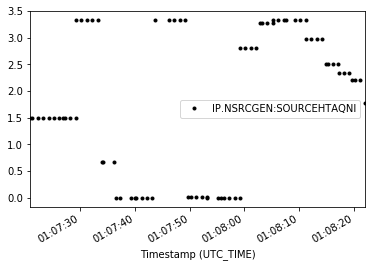

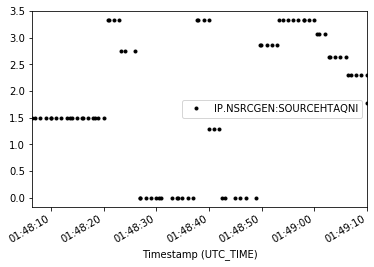

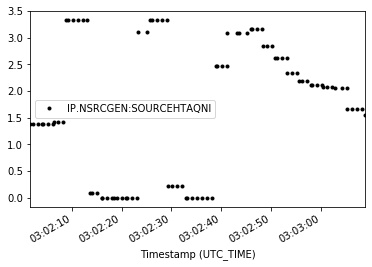

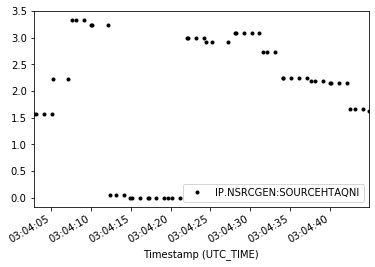

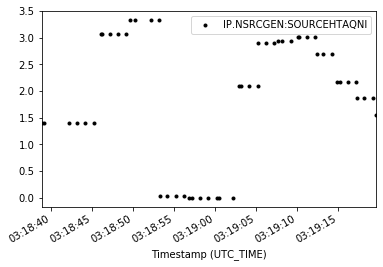

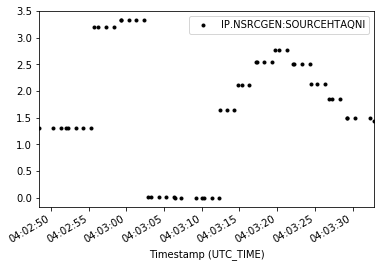

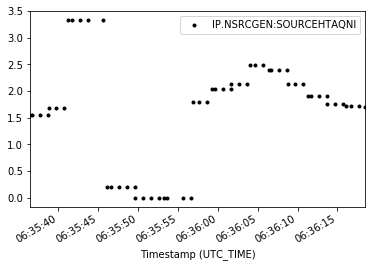

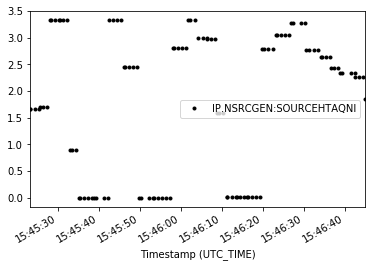

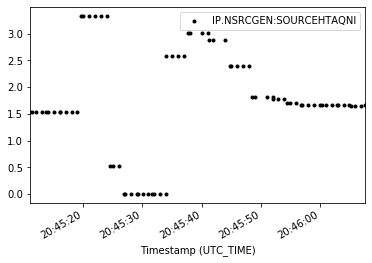

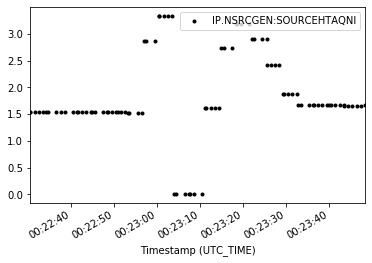

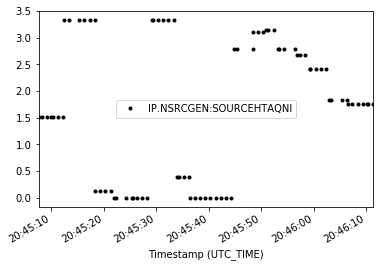

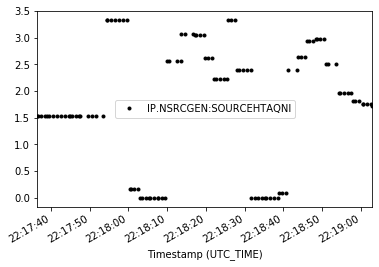

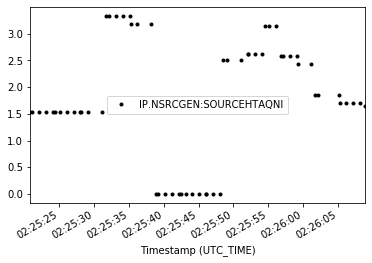

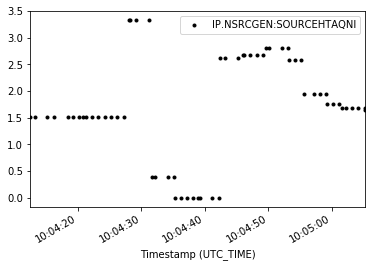

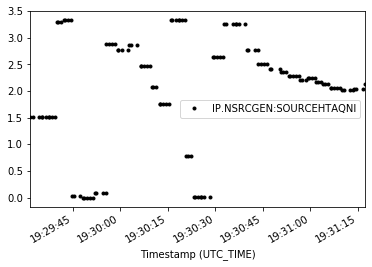

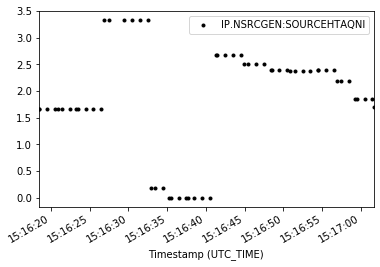

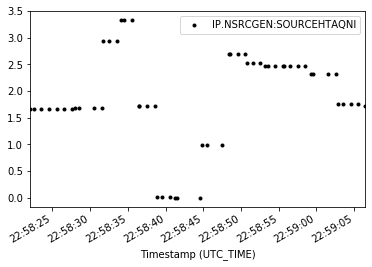

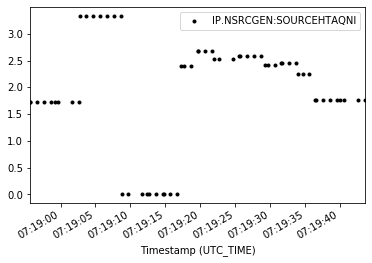

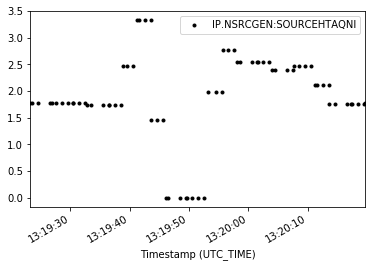

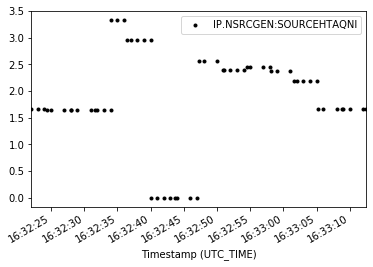

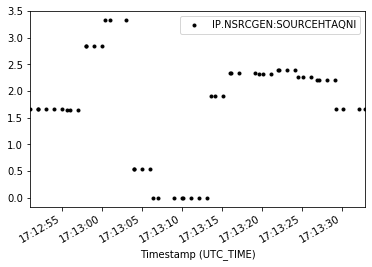

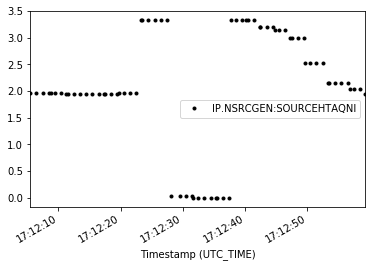

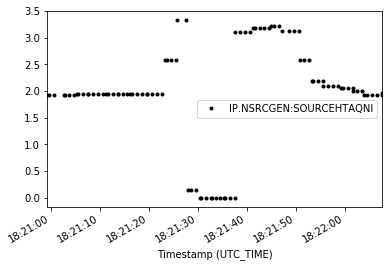

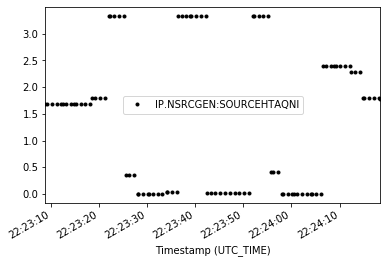

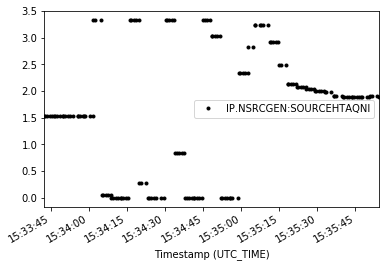

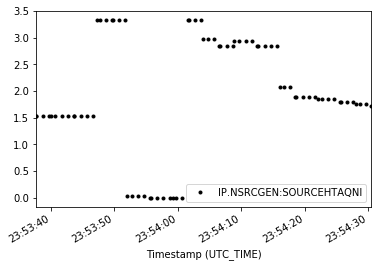

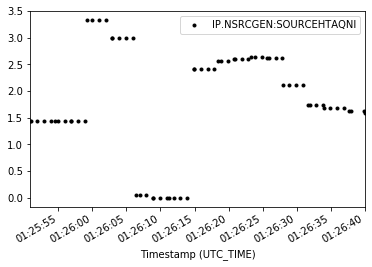

In [41]:
import matplotlib.pyplot as plt
for start, end in breakdown_intervals:
    mask = (df.index >= start) & (df.index <= end)
    df.loc[mask].plot(y='IP.NSRCGEN:SOURCEHTAQNI', style='k.')

In [37]:
stable_intervals = [
    ('2018-11-11 01:10:20.855', '2018-11-11 01:11:22.055'),
    ('2018-11-13 01:51:06.455', '2018-11-13 01:51:10.055'),
    ('2018-11-13 03:05:01.655', '2018-11-13 03:06:08.855'),
    ('2018-11-13 03:07:02.855', '2018-11-13 03:07:44.855'),
    ('2018-11-13 03:22:38.855', '2018-11-13 03:23:19.655'),
    ('2018-11-13 04:05:48.455', '2018-11-13 04:06:32.855'),
    ('2018-11-13 06:38:36.455', '2018-11-13 06:39:18.455'),
    ('2018-11-20 15:48:23.255', '2018-11-20 15:49:44.855'),
    ('2018-11-20 20:48:10.455', '2018-11-20 20:49:07.655'),
    ('2018-11-21 00:25:30.455', '2018-11-21 00:26:48.455'),
    ('2018-11-21 20:48:07.655', '2018-11-21 20:49:11.455'),
    ('2018-11-21 22:20:36.455', '2018-11-21 22:22:02.855'),
    ('2018-11-22 02:28:20.855', '2018-11-22 02:29:08.855'),
    ('2018-11-22 10:07:12.455', '2018-11-22 10:08:05.255'),
    ('2018-11-22 19:32:31.655', '2018-11-22 19:34:17.255'),
    ('2018-11-15 15:19:18.455', '2018-11-15 15:20:01.655'),
    ('2018-11-15 23:01:22.055', '2018-11-15 23:02:06.455'),
    ('2018-11-16 07:21:55.655', '2018-11-16 07:22:43.655'),
    ('2018-11-16 13:22:23.255', '2018-11-16 13:23:19.655'),
    ('2018-11-16 16:35:22.055', '2018-11-16 16:36:12.455'),
    ('2018-11-16 17:15:50.455', '2018-11-16 17:16:32.855'),
    ('2018-11-05 17:15:05.455', '2018-11-05 17:15:59.255'),
    ('2018-11-05 18:23:59.255', '2018-11-05 18:25:07.655'),
    ('2018-11-05 22:26:08.855', '2018-11-05 22:27:18.455'),
    ('2018-11-06 15:54:42.455', '2018-11-06 15:56:54.455'),
    ('2018-11-06 23:56:37.655', '2018-11-06 23:57:30.455'),
    ('2018-11-07 01:28:50.855', '2018-11-07 01:29:40.055'),
]

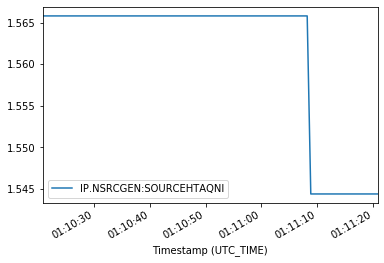

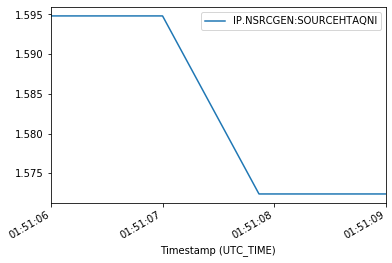

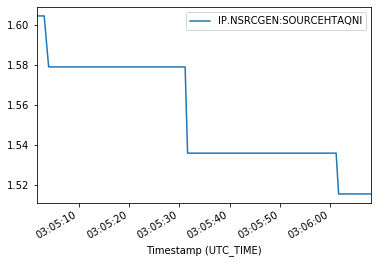

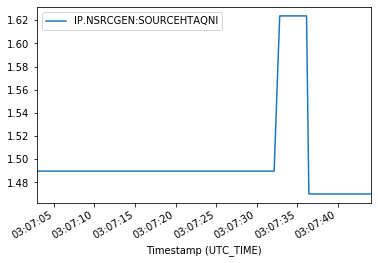

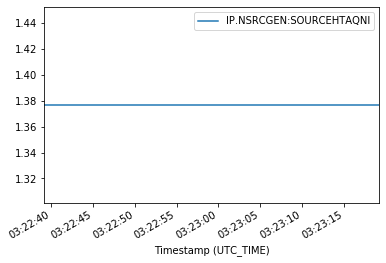

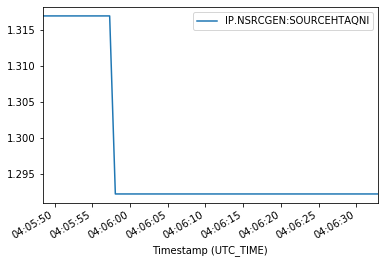

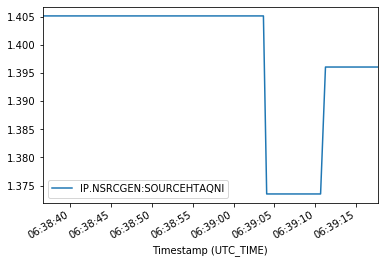

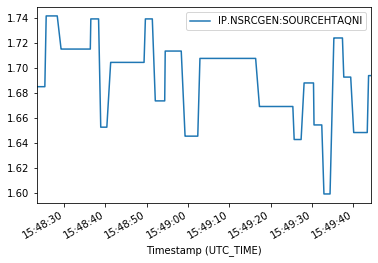

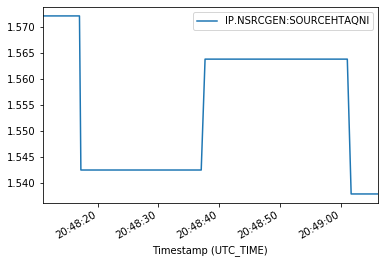

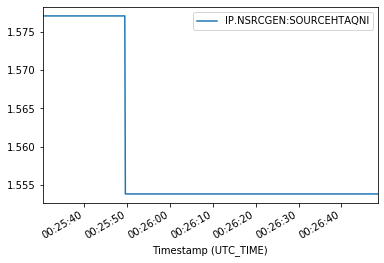

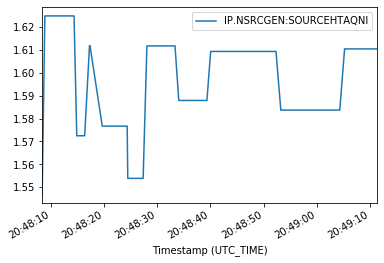

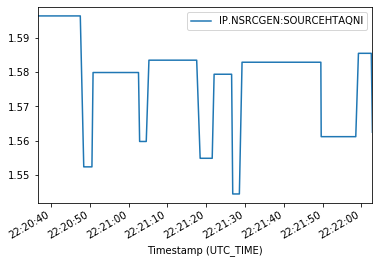

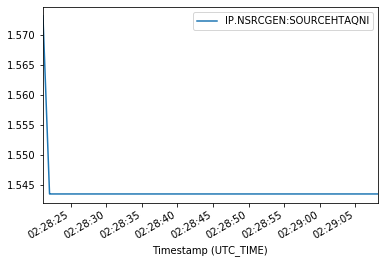

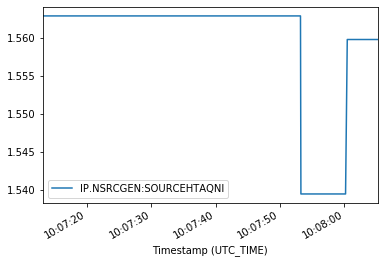

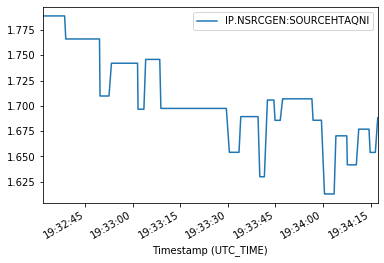

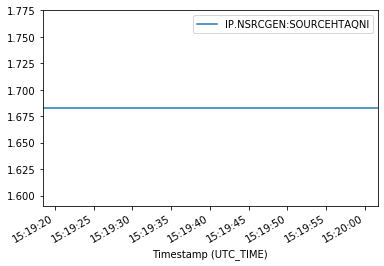

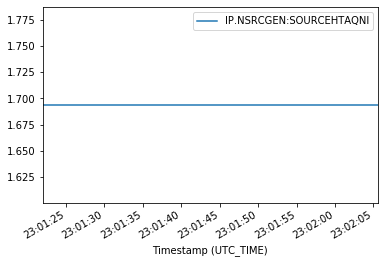

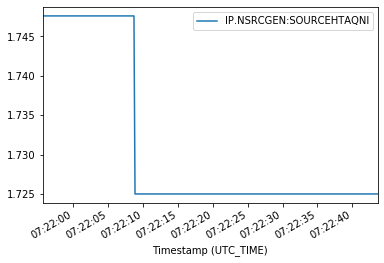

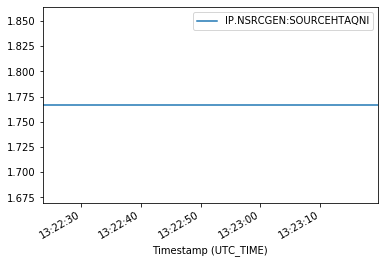

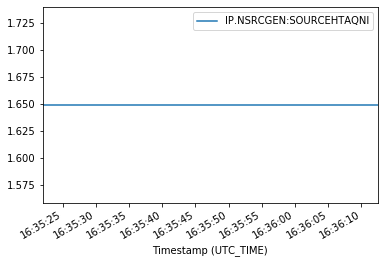

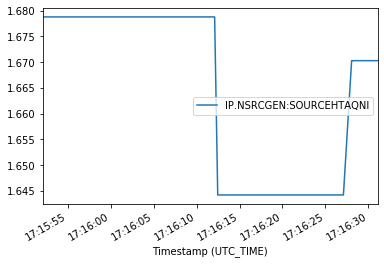

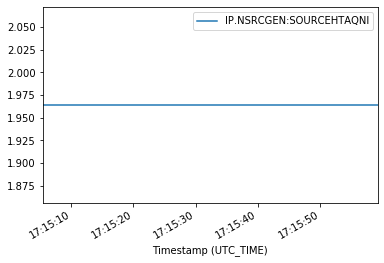

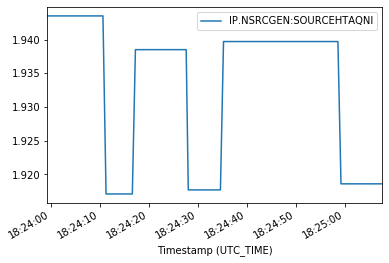

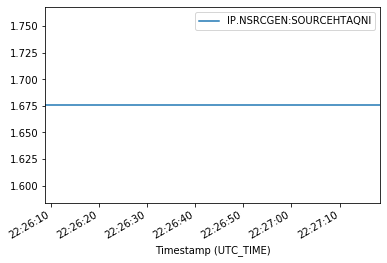

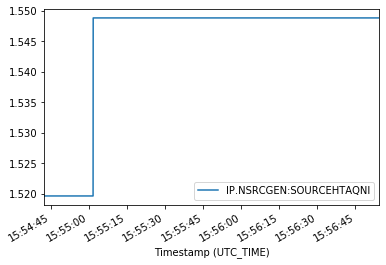

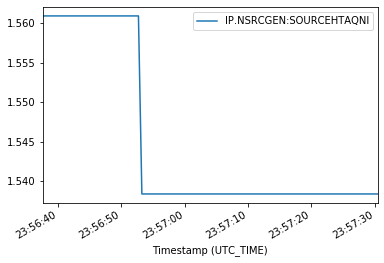

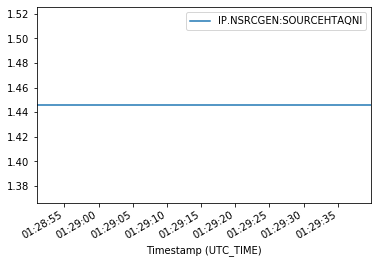

In [38]:
for start, end in stable_intervals:
    mask = (df.index >= start) & (df.index <= end)
    df.loc[mask].plot(y='IP.NSRCGEN:SOURCEHTAQNI')

In [39]:
for start, end in breakdown_intervals:
    mask = (df.index >= start) & (df.index <= end)
    df.loc[mask].to_csv('Voltage_Breakdowns/breakdown_{}_{}.csv'.format(start, end))

In [40]:
for start, end in stable_intervals:
    mask = (df.index >= start) & (df.index <= end)
    df.loc[mask].to_csv('Voltage_Breakdowns/stable_{}_{}.csv'.format(start, end))